In [2]:
using DiffEqBiological;
using DifferentialEquations;
using Plots;
using Latexify;

┌ Info: Precompiling DiffEqBiological [eb300fae-53e8-50a0-950c-e21f52c2b7e0]
└ @ Base loading.jl:1242


ArgumentError: ArgumentError: Package DifferentialEquations not found in current path:
- Run `import Pkg; Pkg.add("DifferentialEquations")` to install the DifferentialEquations package.


20.0

In [20]:
rn = @reaction_network begin
    k, 0 --> X
    mm(X, v, K), X --> Y
    k, Y --> Z
    end k2 v K k;

In [21]:
latexify(rn)

L"\begin{align}
\frac{dX}{dt} =& k - \frac{v \cdot X}{K + X} \cdot X \\
\frac{dY}{dt} =& \frac{v \cdot X}{K + X} \cdot X - k \cdot Y \\
\frac{dZ}{dt} =& k \cdot Y \\
\end{align}
"

In [23]:
u0 = [600., 0.001, 0.001];
tspan = (0., 100.);

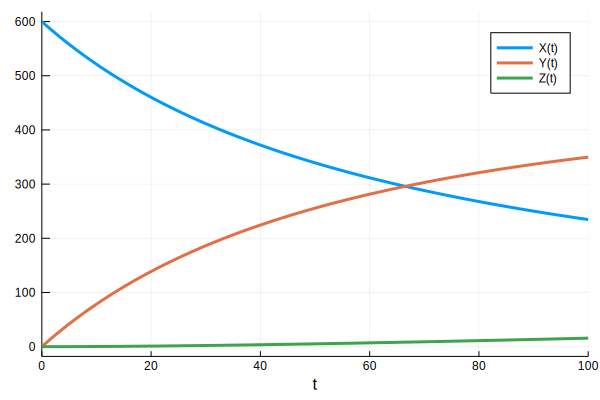

In [24]:
prob_libA = ODEProblem(rn, u0, tspan, p_libA);
sol_libA = solve(prob_libA, DynamicSS(Tsit5()));
plot(sol_libA)